<a href="https://colab.research.google.com/github/Gimmi-07/FFML_Capstone/blob/main/Capstone_01_Basics_of_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning**
Deep learning is a subset of machine learning that employs artificial neural networks to learn from data in a manner similar to how the human brain operates. It is termed "deep" because these neural networks contain multiple layers, allowing the model to learn progressively more complex features from the data.

To grasp this concept, we'll begin with a basic example of image classification. Suppose we want to train a deep learning model to classify images of animals. We would provide the model with a large dataset of labeled animal images, such as cats, dogs, and horses. This process involves several methods and techniques that we will cover.

## 1.Importing the Necessary Libraries

 Necessary libraries (torch, torch.nn, torch.optim, datasets, transforms, matplotlib.pyplot) are imported

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## 2. Defining the Deep Learning Model

 The Net class is defined, which represents a convolutional neural network (CNN) architecture suitable for the CIFAR-10 dataset.


In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 3. Loading and Preprocessing the Data

CIFAR-10 dataset is loaded and preprocessed using transformations (transforms.Compose). Training and test data are loaded into trainloader and testloader, respectively.

Added visualize_samples function to visualize sample images from the CIFAR-10 training dataset. It iterates through the trainloader, extracts images and labels, un-normalizes the images, and displays them using Matplotlib.

Files already downloaded and verified
Files already downloaded and verified


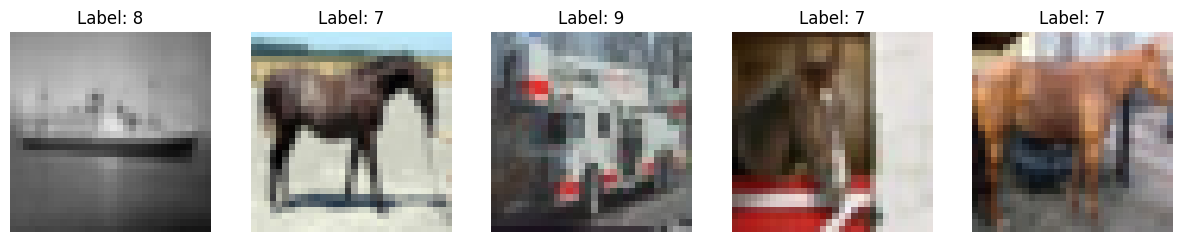

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Visualization function
def visualize_samples(loader, num_samples=5):
    dataiter = iter(loader)
    images, labels = next(dataiter)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        image = images[i].numpy().transpose((1, 2, 0))
        image = (image * 0.5) + 0.5  # Unnormalize
        axes[i].imshow(image)
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')

    plt.show()

# Visualize some samples from the train loader
visualize_samples(trainloader, num_samples=5)



## 4. Training the Model

The model is trained using the defined loss function (nn.CrossEntropyLoss) and optimizer (optim.SGD). Training loop iterates over batches of data, computes loss, performs backpropagation, and updates model parameters.



In [6]:
# Define the loss function and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the model
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,   100] loss: 2.304
[1,   200] loss: 2.303
[1,   300] loss: 2.302
[1,   400] loss: 2.299
[1,   500] loss: 2.297
[1,   600] loss: 2.295
[1,   700] loss: 2.292
[2,   100] loss: 2.277
[2,   200] loss: 2.260
[2,   300] loss: 2.223
[2,   400] loss: 2.174
[2,   500] loss: 2.134
[2,   600] loss: 2.128
[2,   700] loss: 2.112
[3,   100] loss: 2.063
[3,   200] loss: 2.024
[3,   300] loss: 1.996
[3,   400] loss: 1.957
[3,   500] loss: 1.922
[3,   600] loss: 1.877
[3,   700] loss: 1.878
[4,   100] loss: 1.846
[4,   200] loss: 1.793
[4,   300] loss: 1.778
[4,   400] loss: 1.768
[4,   500] loss: 1.734
[4,   600] loss: 1.721
[4,   700] loss: 1.716
[5,   100] loss: 1.696
[5,   200] loss: 1.652
[5,   300] loss: 1.659
[5,   400] loss: 1.629
[5,   500] loss: 1.626
[5,   600] loss: 1.587
[5,   700] loss: 1.601
[6,   100] loss: 1.566
[6,   200] loss: 1.574
[6,   300] loss: 1.544
[6,   400] loss: 1.513
[6,   500] loss: 1.555
[6,   600] loss: 1.516
[6,   700] loss: 1.499
[7,   100] loss: 1.483
[7,   200] 

## 5. Evaluating the Model

Model accuracy is evaluated on the test set. The model predicts labels for test data (testloader) and compares them with actual labels to compute accuracy.



In [7]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 51 %



---

### Conclusion

In this implementation, we've constructed a convolutional neural network (CNN) using PyTorch to classify images from the CIFAR-10 dataset.